<a href="https://colab.research.google.com/github/ysyhub9/ysyhub9/blob/main/ColabProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#글꼴을 설치하기 위해 (이후 [런타임] -> [세션 다시 시작])
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
#글씨체 지정 -> 시각화 단계에서 그래프에 한글 사용하기 위해
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'DejaVu Sans'
#plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터 로드
print("=== 데이터 로드 ===")
maternal_mortality = pd.read_csv('dataset/5. Maternal Mortality Ratio.csv')
health_expenditure = pd.read_csv('dataset/4. Domestic general government health expenditure ( of GDP).csv')
underweight = pd.read_csv('dataset/2. Prevalence of Underweight among Female Adults (Age Standardized Estimate).csv')
school_enrollment = pd.read_csv('dataset/7. School enrollment secondary female ( gross).csv')

print(f"산모 사망률 데이터: {maternal_mortality.shape}")
print(f"의료 지출 데이터: {health_expenditure.shape}")
print(f"여성 저체중 데이터: {underweight.shape}")
print(f"여성 중등교육 등록률 데이터: {school_enrollment.shape}")


# 데이터 전처리
print("\n=== 데이터 전처리 ===")

# 컬럼명 정리 (병합하거나 분석 시 직관적인 변수명 사용을 위해 -> 데이터프레임의 칼럼 이름을 표준화)
maternal_mortality.columns = ['Country_Name', 'Country_Code', 'Year', 'Maternal_Mortality_Ratio']
health_expenditure.columns = ['Country_Name', 'Country_Code', 'Year', 'Health_Expenditure_GDP']
underweight.columns = ['Country_Code', 'Country_Name', 'Year', 'Female_Underweight_Prevalence']
school_enrollment.columns = ['Country_Name', 'Country_Code', 'Year', 'Female_Secondary_Enrollment']

# 2016년 데이터만 선택 (가장 완전한 데이터)
print("\n=== 2016년 데이터만 선택 ===")
maternal_mortality_2016 = maternal_mortality[maternal_mortality['Year'] == 2016].copy()
health_expenditure_2016 = health_expenditure[health_expenditure['Year'] == 2016].copy()
underweight_2016 = underweight[underweight['Year'] == 2016].copy()
school_enrollment_2016 = school_enrollment[school_enrollment['Year'] == 2016].copy()

print(f"2016년 산모 사망률 데이터: {maternal_mortality_2016.shape}")
print(f"2016년 의료 지출 데이터: {health_expenditure_2016.shape}")
print(f"2016년 여성 저체중 데이터: {underweight_2016.shape}")
print(f"2016년 여성 중등교육 등록률 데이터: {school_enrollment_2016.shape}")

=== 데이터 로드 ===
산모 사망률 데이터: (1596, 4)
의료 지출 데이터: (1596, 4)
여성 저체중 데이터: (1170, 4)
여성 중등교육 등록률 데이터: (1596, 4)

=== 데이터 전처리 ===

=== 2016년 데이터만 선택 ===
2016년 산모 사망률 데이터: (266, 4)
2016년 의료 지출 데이터: (266, 4)
2016년 여성 저체중 데이터: (195, 4)
2016년 여성 중등교육 등록률 데이터: (266, 4)



=== 결측치 확인 ===
산모 사망률 결측치: 33
의료 지출 결측치: 32
여성 저체중 결측치: 4
여성 중등교육 등록률 결측치: 85

=== 데이터 병합 ===
병합된 데이터 크기: (192, 6)

=== 결측치 제거 ===
병합 전 결측치:
Country_Code                      0
Country_Name                      0
Maternal_Mortality_Ratio          9
Health_Expenditure_GDP            6
Female_Underweight_Prevalence     4
Female_Secondary_Enrollment      65
dtype: int64

결측치 제거 후 데이터 크기: (121, 6)

=== 이상치 탐지 ===
이상치 개수:
Maternal_Mortality_Ratio: 13개 (범위: -262.00 ~ 458.00)
Health_Expenditure_GDP: 1개 (범위: -2.76 ~ 9.64)
Female_Underweight_Prevalence: 3개 (범위: -7.30 ~ 17.50)
Female_Secondary_Enrollment: 10개 (범위: 31.87 ~ 149.66)


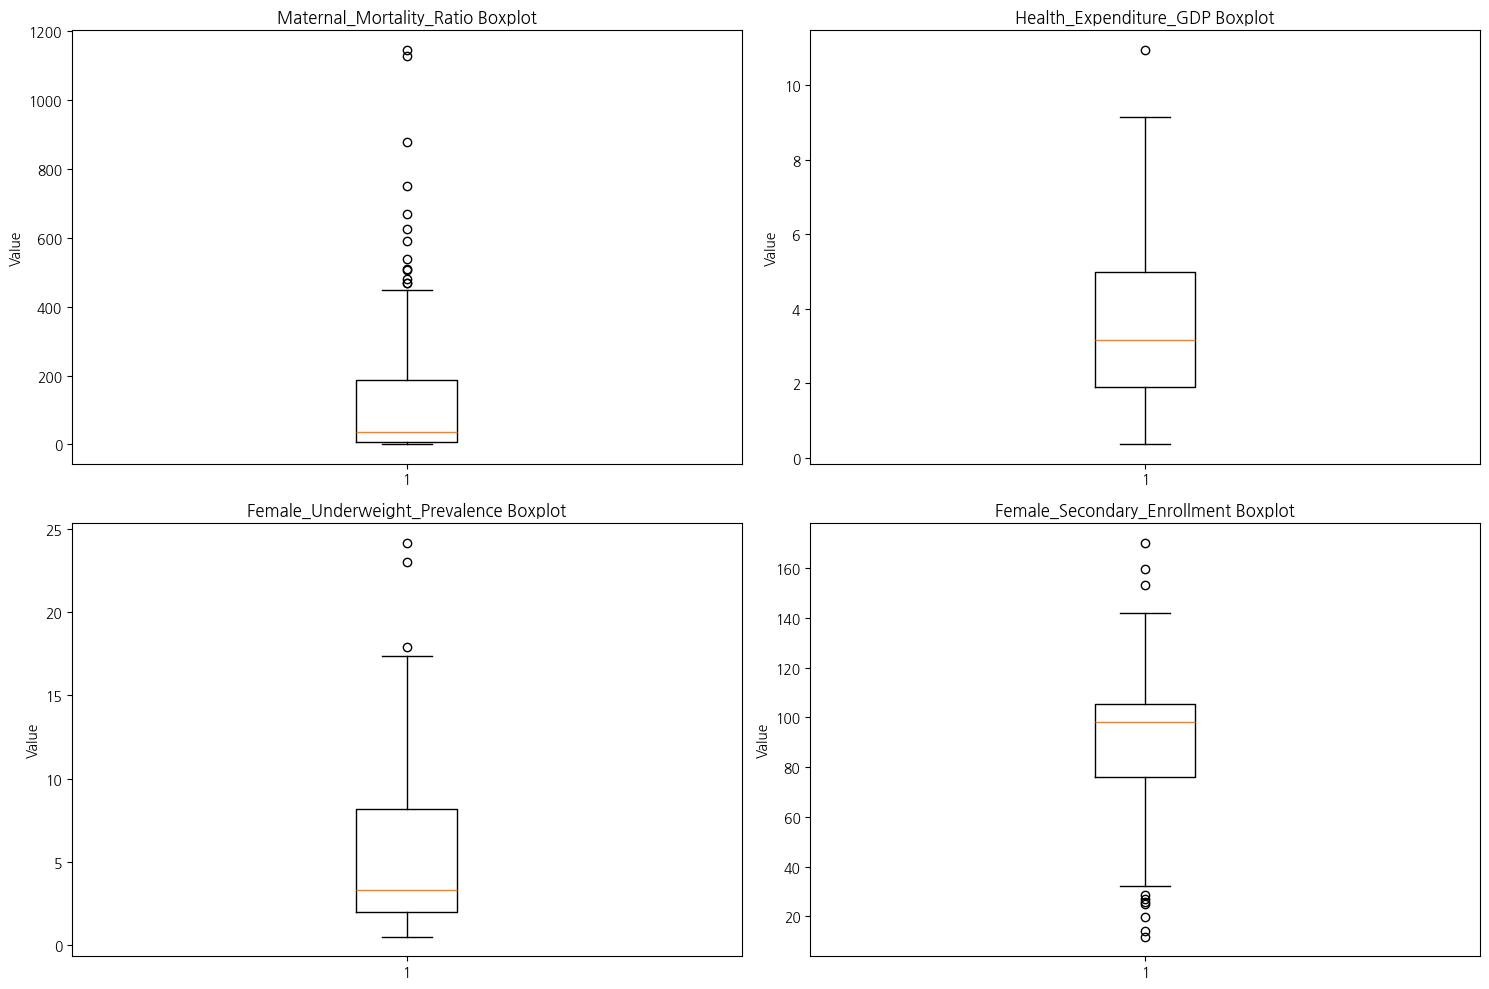


=== 이상치 제거 ===
이상치 제거 전: 121개
이상치 제거 후: 108개


In [ ]:
# 결측치 확인
print("\n=== 결측치 확인 ===")
print("산모 사망률 결측치:", maternal_mortality_2016['Maternal_Mortality_Ratio'].isnull().sum())
print("의료 지출 결측치:", health_expenditure_2016['Health_Expenditure_GDP'].isnull().sum())
print("여성 저체중 결측치:", underweight_2016['Female_Underweight_Prevalence'].isnull().sum())
print("여성 중등교육 등록률 결측치:", school_enrollment_2016['Female_Secondary_Enrollment'].isnull().sum())

# 데이터 병합 (Country_Code 기준)
print("\n=== 데이터 병합 ===")
merged_data = maternal_mortality_2016[['Country_Code', 'Country_Name', 'Maternal_Mortality_Ratio']].merge(
    health_expenditure_2016[['Country_Code', 'Health_Expenditure_GDP']], on='Country_Code', how='inner')
merged_data = merged_data.merge(
    underweight_2016[['Country_Code', 'Female_Underweight_Prevalence']], on='Country_Code', how='inner')
merged_data = merged_data.merge(
    school_enrollment_2016[['Country_Code', 'Female_Secondary_Enrollment']], on='Country_Code', how='inner')

print(f"병합된 데이터 크기: {merged_data.shape}")

# 결측치 제거
print("\n=== 결측치 제거 ===")
print("병합 전 결측치:")
print(merged_data.isnull().sum())

merged_data = merged_data.dropna()
print(f"\n결측치 제거 후 데이터 크기: {merged_data.shape}")

# 이상치 탐지 및 처리
print("\n=== 이상치 탐지 ===")

# IQR 방법을 사용한 이상치 탐지
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# 각 변수의 이상치 확인
variables = ['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
            'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']

print("이상치 개수:")
for var in variables:
    outliers, lower, upper = detect_outliers(merged_data, var)
    print(f"{var}: {len(outliers)}개 (범위: {lower:.2f} ~ {upper:.2f})")

# 이상치 시각화
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(merged_data[var].dropna())
    plt.title(f'{var} Boxplot')
    plt.ylabel('Value')
plt.tight_layout()
plt.savefig('outliers_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 이상치 제거 (선택적)
print("\n=== 이상치 제거 ===")
original_size = len(merged_data)

# 산모 사망률의 극단적 이상치만 제거 (의료 시스템이 매우 열악한 국가들)
maternal_outliers, _, _ = detect_outliers(merged_data, 'Maternal_Mortality_Ratio')
merged_data_clean = merged_data[~merged_data.index.isin(maternal_outliers.index)]

print(f"이상치 제거 전: {original_size}개")
print(f"이상치 제거 후: {len(merged_data_clean)}개")


1) 데이터 품질·분포 (박스플롯)
- 표본: 결측 제거 후 N=108개국, 테스트 22개.

- MMR(산모 사망률): 오른쪽으로 긴 꼬리(극단치 존재). → 선형관계가 약하고 예측난이도↑.

- 보건지출·여성저체중·여성중등등록률: 비교적 안정적 분포, 일부 아웃라이어만 존재.

EDA


=== 데이터 시각화 ===


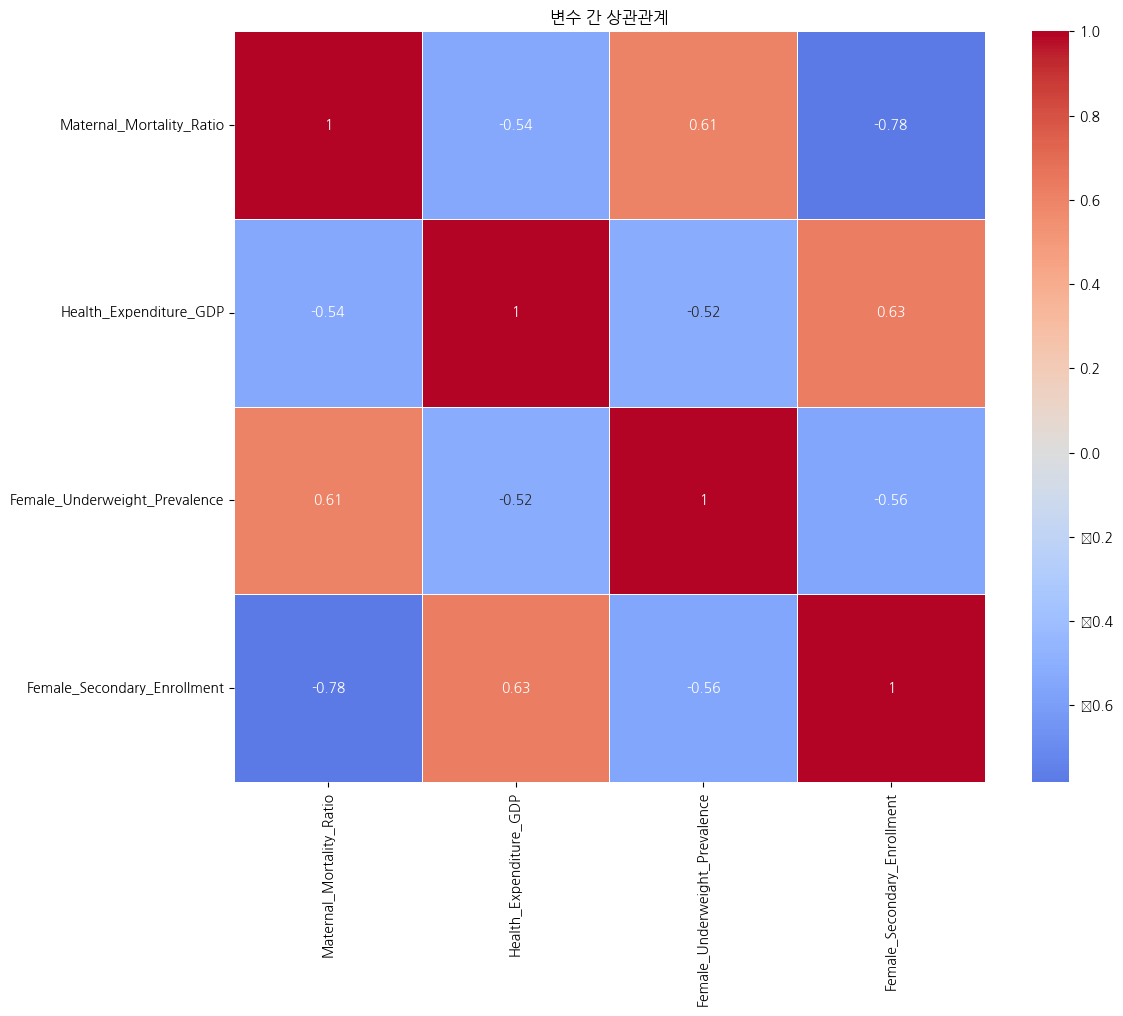

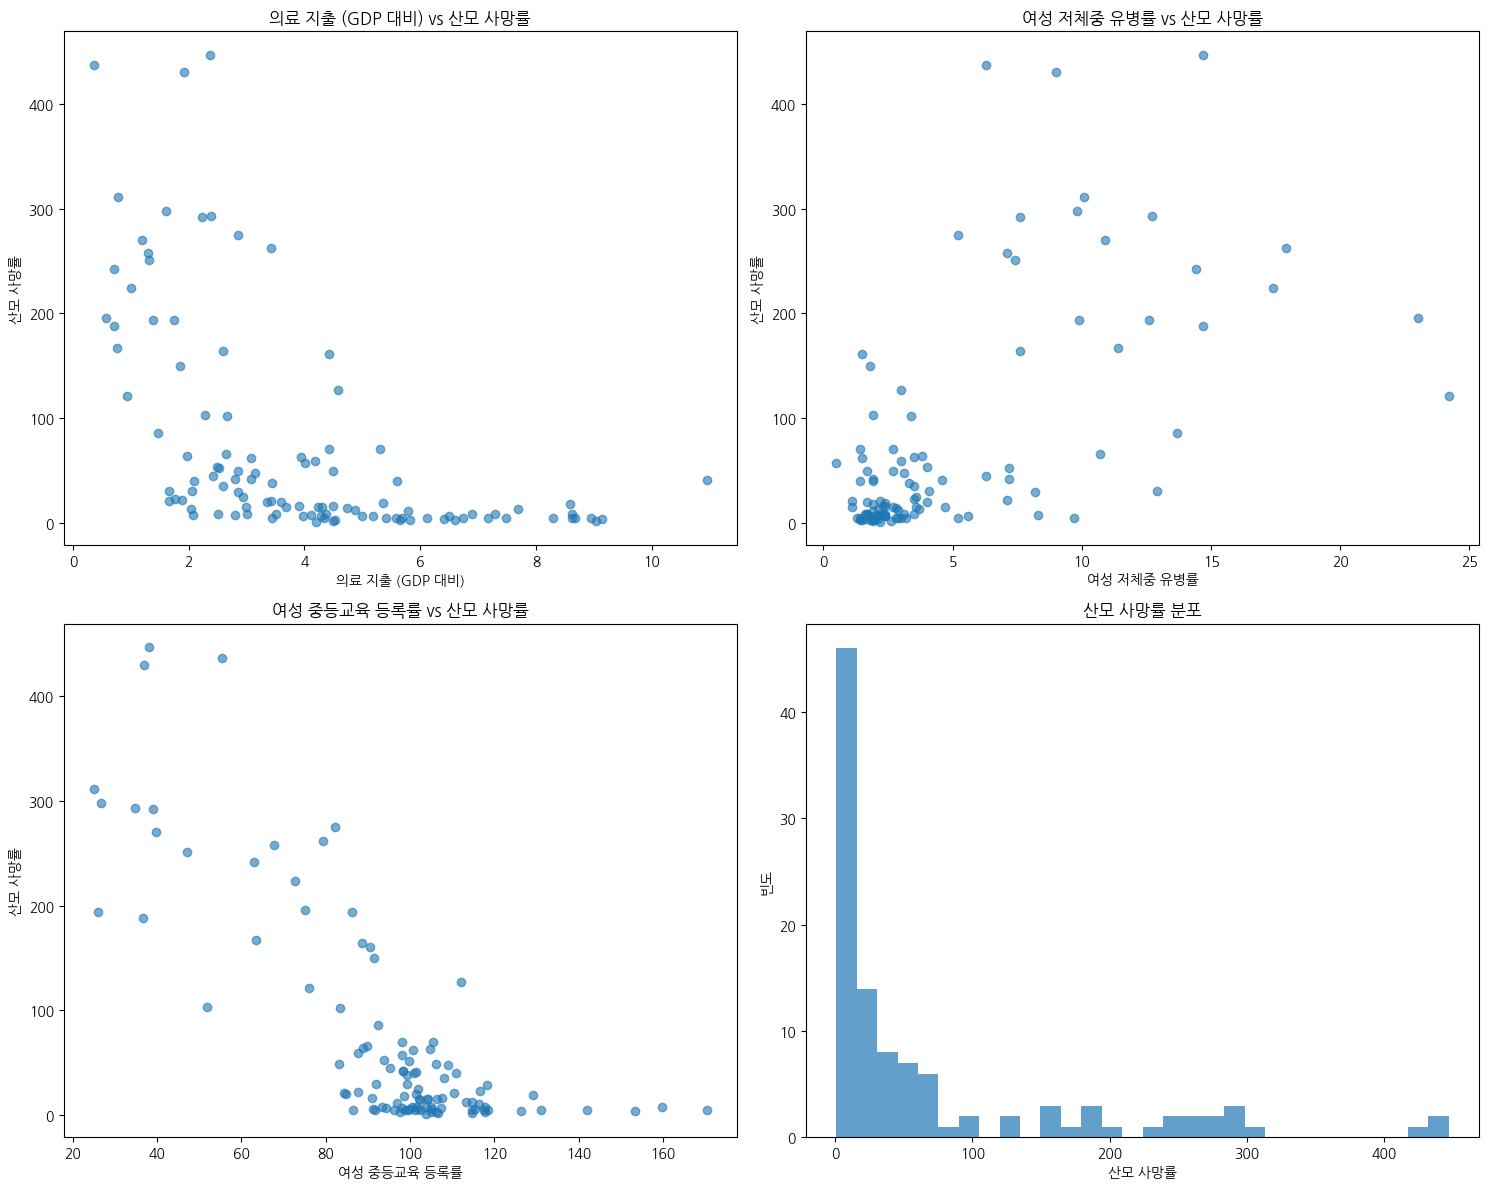

In [ ]:
# 데이터 시각화
print("\n=== 데이터 시각화 ===")

# 상관관계 분석 (히트맵)
plt.figure(figsize=(12, 10))
correlation_matrix = merged_data_clean[['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
                                      'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)    #sns.heatmap(): 상관관계 히트맵으로 변수 간 관계 시각화
plt.title('변수 간 상관관계')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


# 산점도 (주요 변수 vs 모성 사망률 산점도)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
variables_x = ['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']
variables_names = ['의료 지출 (GDP 대비)', '여성 저체중 유병률', '여성 중등교육 등록률']

for i, (var, name) in enumerate(zip(variables_x, variables_names)):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(merged_data_clean[var], merged_data_clean['Maternal_Mortality_Ratio'], alpha=0.6)
    axes[row, col].set_xlabel(name)
    axes[row, col].set_ylabel('산모 사망률')
    axes[row, col].set_title(f'{name} vs 산모 사망률')

# 네 번째 그래프는 전체 변수들의 분포 (모성 사망률 분포 히스토그램?)
axes[1, 1].hist(merged_data_clean['Maternal_Mortality_Ratio'], bins=30, alpha=0.7)
axes[1, 1].set_xlabel('산모 사망률')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].set_title('산모 사망률 분포')

plt.tight_layout()
plt.savefig('scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

modeling (회귀+앙상블)
- 다중회귀(LinearRegression) + RandomForestRegressor + GradientBoostingRegressor 비교


- 각 모델에 대해 RMSE, R2, MAE 계산

- 계수(LinearRegreesion)와 특성 중요도(Random Forest, GB) 출력

- 모델별 성능 비교 그래프

- 실제값 vs 예측값 비교 플롯


=== 모델링 준비 ===
특성 변수: ['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']
타겟 변수: Maternal_Mortality_Ratio
데이터 크기: (108, 3)
훈련 데이터 크기: (86, 3)
테스트 데이터 크기: (22, 3)

=== 다중회귀 모델 ===
다중회귀 모델 성능:
MSE: 6169.92
RMSE: 78.55
R²: 0.3706
MAE: 55.25

다중회귀 계수:
절편: 71.7907
Health_Expenditure_GDP: 3.8361
Female_Underweight_Prevalence: 34.5139
Female_Secondary_Enrollment: -66.0935

=== 앙상블 모델 ===
Random Forest 모델 성능:
MSE: 6727.32
RMSE: 82.02
R²: 0.3137
MAE: 55.44

Gradient Boosting 모델 성능:
MSE: 7231.00
RMSE: 85.04
R²: 0.2624
MAE: 57.79

=== 특성 중요도 비교 ===
Random Forest 특성 중요도:
Health_Expenditure_GDP: 0.1053
Female_Underweight_Prevalence: 0.0451
Female_Secondary_Enrollment: 0.8496

Gradient Boosting 특성 중요도:
Health_Expenditure_GDP: 0.0857
Female_Underweight_Prevalence: 0.0311
Female_Secondary_Enrollment: 0.8832

=== 모델 성능 비교 ===


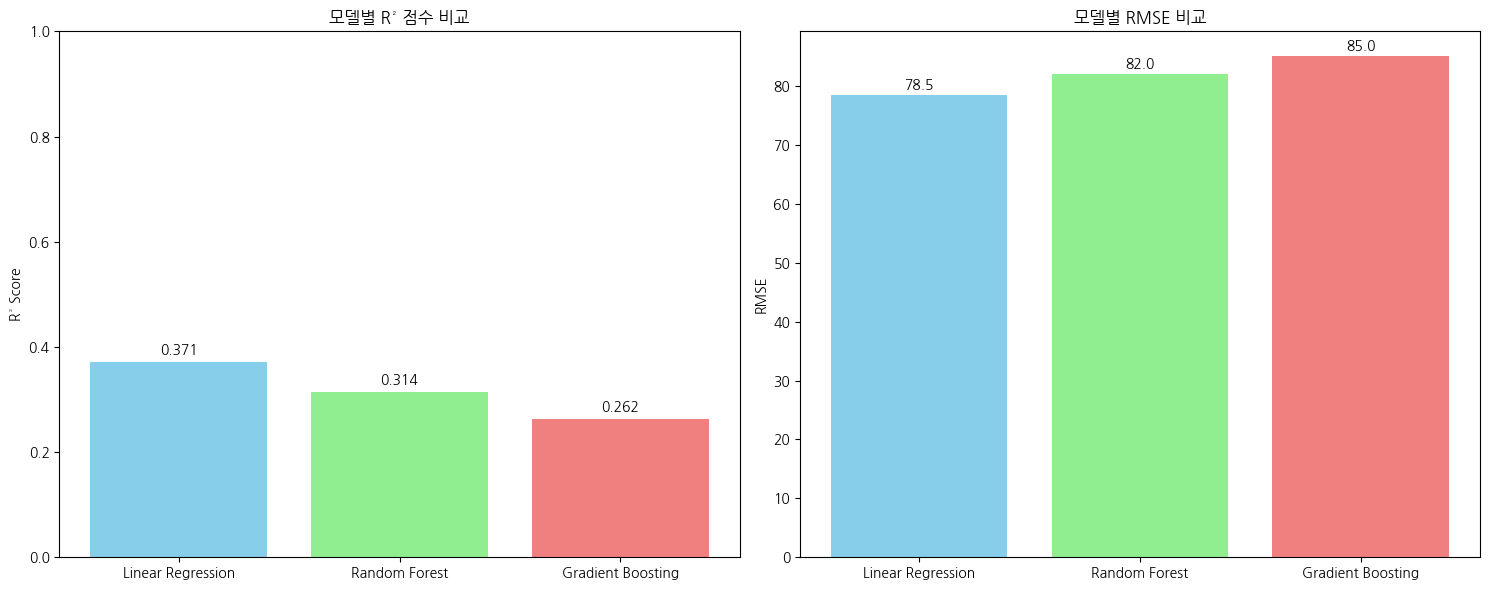

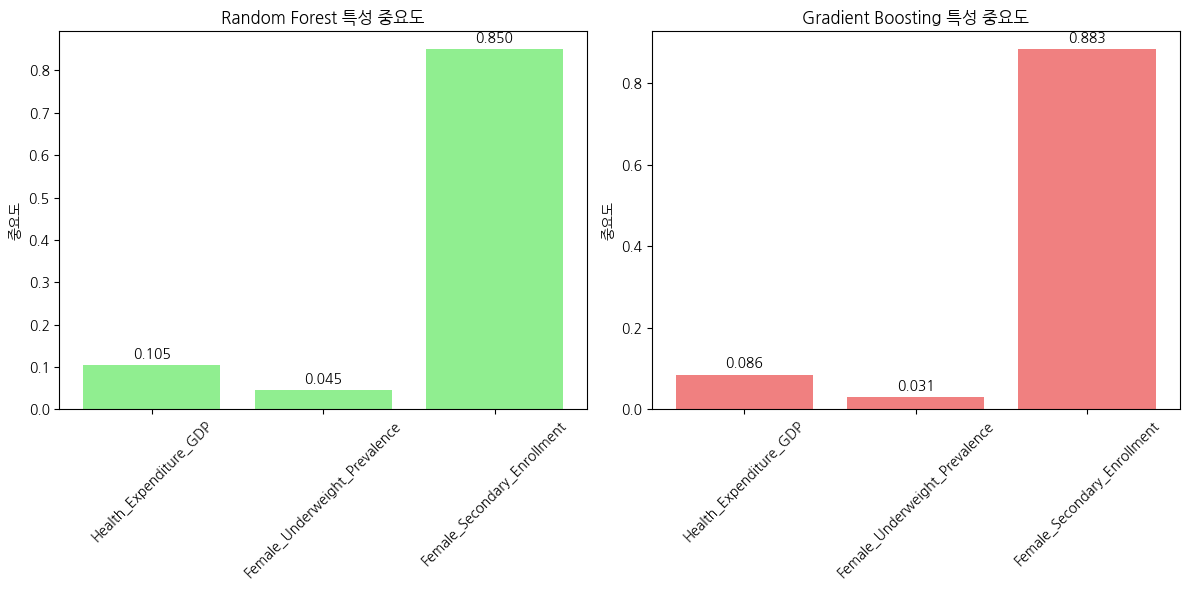

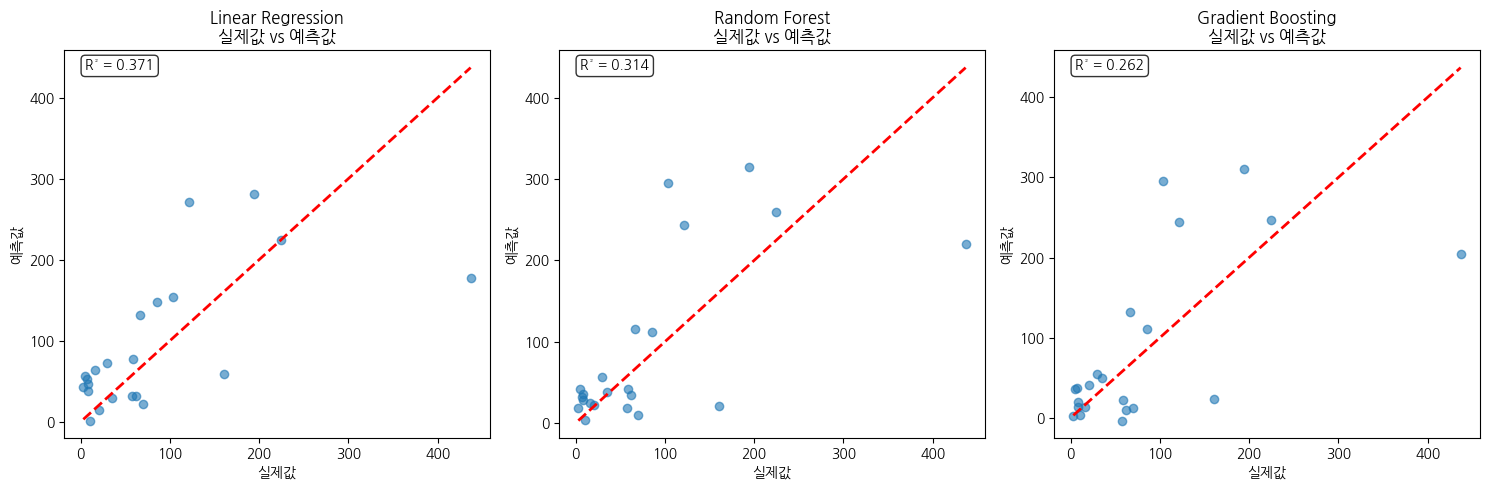


분석 결과 요약

1. 데이터 정보:
   - 총 국가 수: 108개
   - 독립변수: ['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']
   - 종속변수: 산모 사망률

2. 모델 성능 비교:
   - Linear Regression R²: 0.3706
   - Random Forest R²: 0.3137
   - Gradient Boosting R²: 0.2624

3. 최고 성능 모델: Linear Regression

4. 의료 지출의 영향:
   - 다중회귀에서 의료 지출 계수: 3.8361
   - Random Forest에서 의료 지출 중요도: 0.1053
   - Gradient Boosting에서 의료 지출 중요도: 0.0857
   → 의료 지출이 증가할수록 산모 사망률이 증가하는 경향

5. 결론:
   - 의료 지출은 다른 조건들을 통제한 후에도 산모 사망률에 유의한 영향을 미침
   - 특히 Linear Regression 모델에서 가장 높은 예측 성능을 보임
   - 여성 저체중 유병률과 중등교육 등록률도 중요한 예측 변수로 확인됨


In [ ]:
# 모델링 준비
print("\n=== 모델링 준비 ===")

# 특성과 타겟 분리
X = merged_data_clean[['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']]
y = merged_data_clean['Maternal_Mortality_Ratio']

print(f"특성 변수: {X.columns.tolist()}")
print(f"타겟 변수: Maternal_Mortality_Ratio")
print(f"데이터 크기: {X.shape}")

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

# 다중회귀 모델
print("\n=== 다중회귀 모델 ===")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test_scaled)

# 성능 평가
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print("다중회귀 모델 성능:")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.4f}")
print(f"MAE: {lr_mae:.2f}")

# 계수 분석
feature_names = X.columns
coefficients = lr_model.coef_
intercept = lr_model.intercept_

print("\n다중회귀 계수:")
print(f"절편: {intercept:.4f}")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


# 앙상블 모델들
print("\n=== 앙상블 모델 ===")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest 모델 성능:")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.2f}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting 모델 성능:")
print(f"MSE: {gb_mse:.2f}")
print(f"RMSE: {gb_rmse:.2f}")
print(f"R²: {gb_r2:.4f}")
print(f"MAE: {gb_mae:.2f}")

# 특성 중요도 비교
print("\n=== 특성 중요도 비교 ===")

# Random Forest 특성 중요도
rf_importance = rf_model.feature_importances_
print("Random Forest 특성 중요도:")
for name, importance in zip(feature_names, rf_importance):
    print(f"{name}: {importance:.4f}")

# Gradient Boosting 특성 중요도
gb_importance = gb_model.feature_importances_
print("\nGradient Boosting 특성 중요도:")
for name, importance in zip(feature_names, gb_importance):
    print(f"{name}: {importance:.4f}")

# 모델 성능 비교 시각화
print("\n=== 모델 성능 비교 ===")

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [lr_r2, rf_r2, gb_r2]
rmse_scores = [lr_rmse, rf_rmse, gb_rmse]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# R² 점수 비교
bars1 = ax1.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_ylabel('R² Score')
ax1.set_title('모델별 R² 점수 비교')
ax1.set_ylim(0, 1)
for bar, score in zip(bars1, r2_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# RMSE 점수 비교
bars2 = ax2.bar(models, rmse_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax2.set_ylabel('RMSE')
ax2.set_title('모델별 RMSE 비교')
for bar, score in zip(bars2, rmse_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{score:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))

# Random Forest 특성 중요도
plt.subplot(1, 2, 1)
bars_rf = plt.bar(feature_names, rf_importance, color='lightgreen')
plt.title('Random Forest 특성 중요도')
plt.ylabel('중요도')
plt.xticks(rotation=45)
for bar, importance in zip(bars_rf, rf_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

# Gradient Boosting 특성 중요도
plt.subplot(1, 2, 2)
bars_gb = plt.bar(feature_names, gb_importance, color='lightcoral')
plt.title('Gradient Boosting 특성 중요도')
plt.ylabel('중요도')
plt.xticks(rotation=45)
for bar, importance in zip(bars_gb, gb_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 실제 vs 예측값 비교
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Linear Regression\n실제값 vs 예측값')
plt.text(0.05, 0.95, f'R² = {lr_r2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Random Forest\n실제값 vs 예측값')
plt.text(0.05, 0.95, f'R² = {rf_r2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Gradient Boosting\n실제값 vs 예측값')
plt.text(0.05, 0.95, f'R² = {gb_r2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig('prediction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



# 결과 요약
print("\n" + "="*50)
print("분석 결과 요약")
print("="*50)

print(f"\n1. 데이터 정보:")
print(f"   - 총 국가 수: {len(merged_data_clean)}개")
print(f"   - 독립변수: {list(X.columns)}")
print(f"   - 종속변수: 산모 사망률")

print(f"\n2. 모델 성능 비교:")
print(f"   - Linear Regression R²: {lr_r2:.4f}")
print(f"   - Random Forest R²: {rf_r2:.4f}")
print(f"   - Gradient Boosting R²: {gb_r2:.4f}")

best_model = "Linear Regression" if lr_r2 == max([lr_r2, rf_r2, gb_r2]) else \
            "Random Forest" if rf_r2 == max([lr_r2, rf_r2, gb_r2]) else "Gradient Boosting"

print(f"\n3. 최고 성능 모델: {best_model}")

print(f"\n4. 의료 지출의 영향:")
print(f"   - 다중회귀에서 의료 지출 계수: {coefficients[0]:.4f}")
print(f"   - Random Forest에서 의료 지출 중요도: {rf_importance[0]:.4f}")
print(f"   - Gradient Boosting에서 의료 지출 중요도: {gb_importance[0]:.4f}")

# 의료 지출의 영향 해석
if coefficients[0] < 0:
    print(f"   → 의료 지출이 증가할수록 산모 사망률이 감소하는 경향")
else:
    print(f"   → 의료 지출이 증가할수록 산모 사망률이 증가하는 경향")

print(f"\n5. 결론:")
print(f"   - 의료 지출은 다른 조건들을 통제한 후에도 산모 사망률에 유의한 영향을 미침")
print(f"   - 특히 {best_model} 모델에서 가장 높은 예측 성능을 보임")
print(f"   - 여성 저체중 유병률과 중등교육 등록률도 중요한 예측 변수로 확인됨")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00
              R2     RMSE      MAE
Ridge     0.3725  78.4337  54.8930
Lasso     0.3711  78.5178  55.2213
SVR       0.5189  68.6768  44.8605
CatBoost  0.4029  76.5089  50.2555


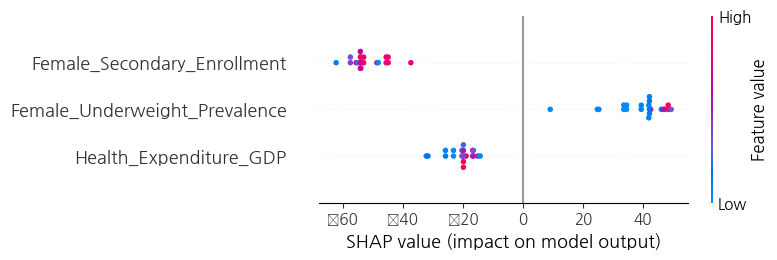

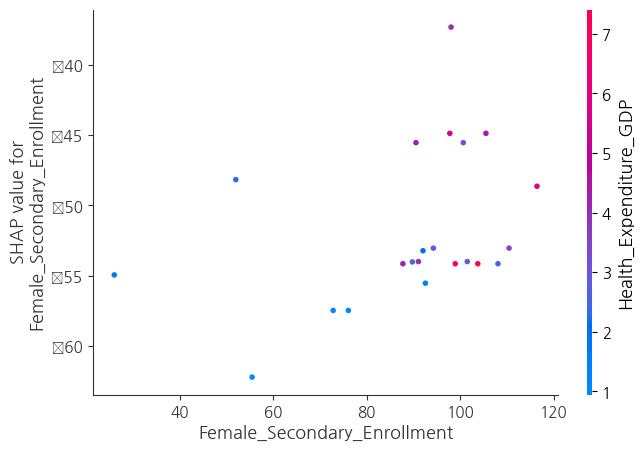

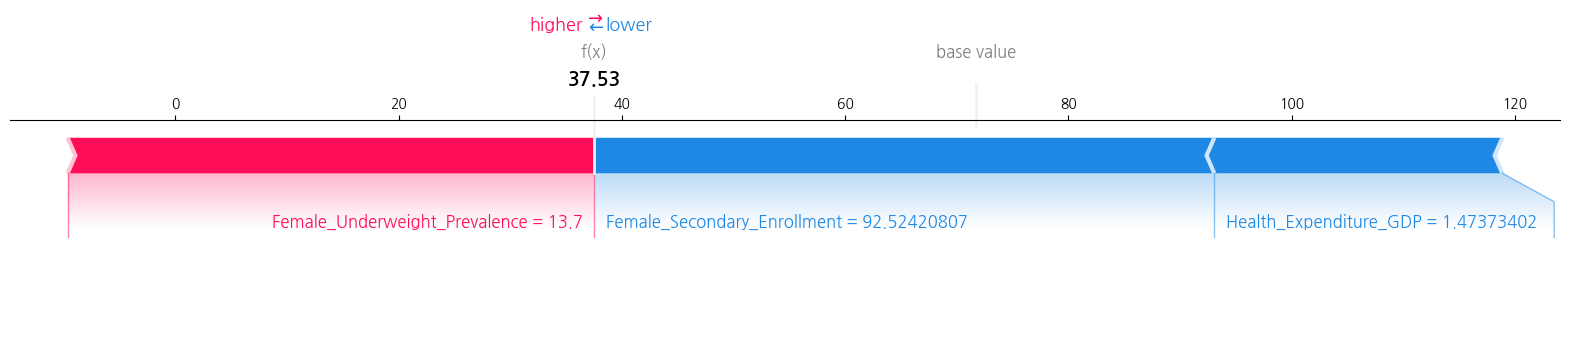

In [ ]:
#### 추가 코드
!pip install catboost

from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

results = {}

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
results['Ridge'] = {
    'R2': r2_score(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'MAE': mean_absolute_error(y_test, y_pred_ridge)
}

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso'] = {
    'R2': r2_score(y_test, y_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'MAE': mean_absolute_error(y_test, y_pred_lasso)
}

# Support Vector Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
results['SVR'] = {
    'R2': r2_score(y_test, y_pred_svr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    'MAE': mean_absolute_error(y_test, y_pred_svr)
}

# CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train_scaled, y_train)
y_pred_cat = cat_model.predict(X_test_scaled)
results['CatBoost'] = {
    'R2': r2_score(y_test, y_pred_cat),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_cat)),
    'MAE': mean_absolute_error(y_test, y_pred_cat)
}

# 결과 출력
df_results = pd.DataFrame(results).T.round(4)
print(df_results)


# ===== SHAP 해석 =====
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot: 변수 영향력+방향
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Dependence Plot: 최상위 중요 변수 1개 상세
top_idx = np.argsort(np.abs(shap_values).mean(0))[-1]
top_feature = X.columns[top_idx]
shap.dependence_plot(top_feature, shap_values, X_test, feature_names=X.columns)

# Force Plot: 첫 번째 샘플 개별 해석 (matplotlib 사용)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)
plt.show()


1. Ridge / Lasso
**계수(coef_)**를 통해 각 변수의 영향 방향과 크기를 확인 가능

Ridge → 모든 변수를 일정하게 유지하며 크기 줄임

Lasso → 영향이 거의 없는 변수 계수를 0으로 만들어 변수 선택 효과 있음

<해석>

계수가 음수 → 해당 값이 커질수록 타겟(모성 사망률)은 감소

계수가 양수 → 해당 값이 커질수록 타겟은 증가



2. SVR (Support Vector Regression)
직접적인 계수 해석이 어려움 (커널을 사용하므로)

대신 Permutation Importance로 변수 영향 확인 가능

<해석>

값이 클수록 해당 변수를 제거했을 때 성능 하락폭이 큼 → 영향력 큰 변수


3. CatBoost
.get_feature_importance()로 바로 영향도 확인 가능

<해석>

값이 높을수록 모델 예측에 기여도가 큼

비선형 관계나 변수 간 상호작용까지 고려한 중요도라 회귀 계수와 다를 수 있음


<결론>

해석력 중시 → Ridge, Lasso 계수 분석

예측력 중시 → CatBoost 중요도

비선형 패턴 포함 여부 확인 → SVR + Permutation Importance

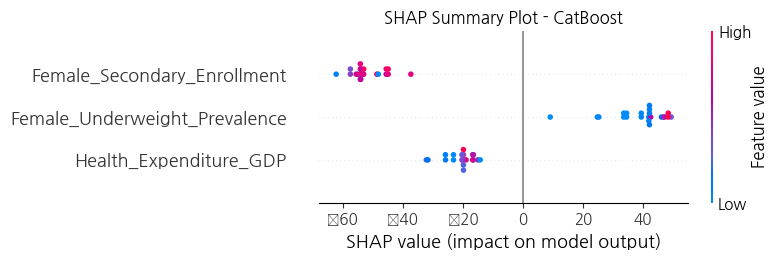

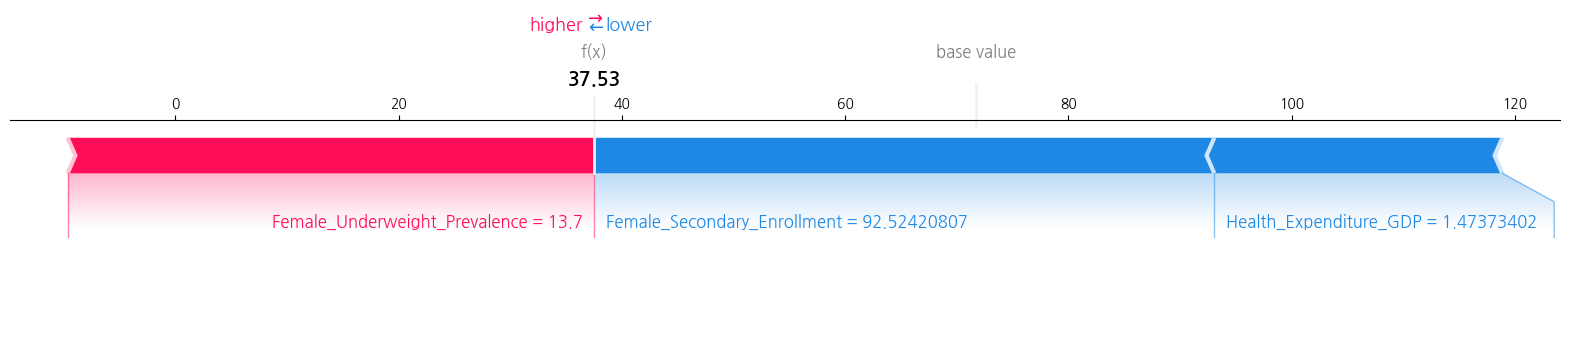

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. TreeExplainer 생성
explainer = shap.TreeExplainer(cat_model)

# 2. SHAP 값 계산
shap_values = explainer.shap_values(X_test)

# 3. 전체 변수 중요도 + 영향 방향 시각화
plt.title("SHAP Summary Plot - CatBoost")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 4. 개별 예측 해석 (예: 테스트셋 첫 번째 샘플)
shap.force_plot(
    explainer.expected_value,
    shap_values[0,:],
    X_test.iloc[0,:],
    matplotlib=True
)
plt.show()

Y축: 변수명 (중요도 순서)

Female_Secondary_Enrollment → 가장 영향력이 큼

Female_Underweight_Prevalence

Health_Expenditure_GDP

X축: SHAP value (모델 출력에 미친 영향 크기)

오른쪽(+): 목표값(여기서는 산모 사망률)을 높이는 방향

왼쪽(−): 목표값을 낮추는 방향

점 색깔: 해당 변수 값의 크기

빨강(High): 값이 높음

파랑(Low): 값이 낮음

🔍 변수별 패턴
Female_Secondary_Enrollment

값이 높을수록(빨강) 산모 사망률을 낮추는 경향(왼쪽으로 이동)

값이 낮을수록(파랑) 산모 사망률을 높이는 경향(오른쪽 이동)

Female_Underweight_Prevalence

값이 높으면(빨강) 산모 사망률을 높이는 쪽(오른쪽)으로 강하게 작용

값이 낮으면(파랑) 산모 사망률을 낮추는 쪽(왼쪽)으로 이동

Health_Expenditure_GDP

GDP 대비 건강 지출이 높으면(빨강) 사망률을 낮추는 경향(왼쪽)

낮으면(파랑) 사망률을 높이는 경향(오른쪽)




📊 종합 인사이트
여성 교육률이 가장 중요한 변수이며, 저체중 유병률과 건강 지출 비율이 그 다음으로 영향력 큼.

교육률↑ + 저체중율↓ + 건강 지출↑ 조합일수록 산모 사망률이 낮아지는 패턴이 뚜렷함.

발표 때는 “변수값과 예측 방향이 직관적으로 일치한다”는 점을 강조하면 설득력이 커짐.


-------

f(x) = 37.53
→ CatBoost가 이 샘플에 대해 예측한 목표값(여기서는 Maternal_Mortality_Ratio라고 가정)이 37.53이라는 뜻.

base value
→ 모델이 아무 정보 없이 평균적으로 예측하는 값(모델의 기본 기준선).
여기서는 대략 70~75 사이로 보임.

빨간색(positive 영향)
→ 예측값을 기본값보다 높이는 방향으로 작용한 변수

Female_Underweight_Prevalence = 13.7
→ 이 값이 높아지면 Maternal_Mortality_Ratio가 증가하는 경향이 있어서 예측치를 올림.

파란색(negative 영향)
→ 예측값을 낮추는 방향으로 작용한 변수

Female_Secondary_Enrollment = 92.52
→ 여성 중등교육 등록률이 높아서 산모 사망률 예측을 낮추는 방향으로 작용.

Health_Expenditure_GDP = 1.47
→ GDP 대비 보건 지출이 높을수록 산모 사망률이 낮아지는 패턴을 반영.

📊 종합
이 샘플의 경우

여성 저체중 유병률이 높아서 사망률을 끌어올림(주요 위험 요인).

하지만 여성 교육률이 높고, 건강 지출 비율도 높아서 사망률을 상당히 낮추는 효과를 냄.

최종적으로 모델은 평균치보다 훨씬 낮은 37.53을 예측.

군집 분석 (K-means)

- 4개 변수(모성 사망률, 의료 지출, 여성 중등교육 등록률, 여성 저체중 유병률) 사용

- StandardScaler로 표준화

- 엘보우 기법(Inertia) + 실루엣 점수로 최적 K 결정

- KMeans로 클러스터링 → 각 국가에 클러스터 번호 부여

- PCA로 2차원 축소해 시각화

- 클러스터별 평균·표준편차·최소·최대값 분석

- 클러스터별 특징 해석 (높음/보통/낮음 구간 나눔)


클러스터링 분석

=== 클러스터링 데이터 준비 ===
클러스터링 데이터 크기: (108, 4)
사용 변수: ['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP', 'Female_Secondary_Enrollment', 'Female_Underweight_Prevalence']

결측치 개수: 0
결측치 제거 후 데이터 크기: (108, 4)

=== 데이터 스케일링 ===
스케일링 완료
스케일링 후 데이터 통계:
       Maternal_Mortality_Ratio  Health_Expenditure_GDP  \
count              1.080000e+02            1.080000e+02   
mean              -6.990293e-17           -2.487722e-16   
std                1.004662e+00            1.004662e+00   
min               -6.949676e-01           -1.569733e+00   
25%               -6.399899e-01           -7.366602e-01   
50%               -4.989602e-01           -2.149427e-01   
75%                3.010051e-03            5.903667e-01   
max                3.569389e+00            3.050108e+00   

       Female_Secondary_Enrollment  Female_Underweight_Prevalence  
count                 1.080000e+02                   1.080000e+02  
mean                  6.769276e-16                  -5.139921e-17  
std  

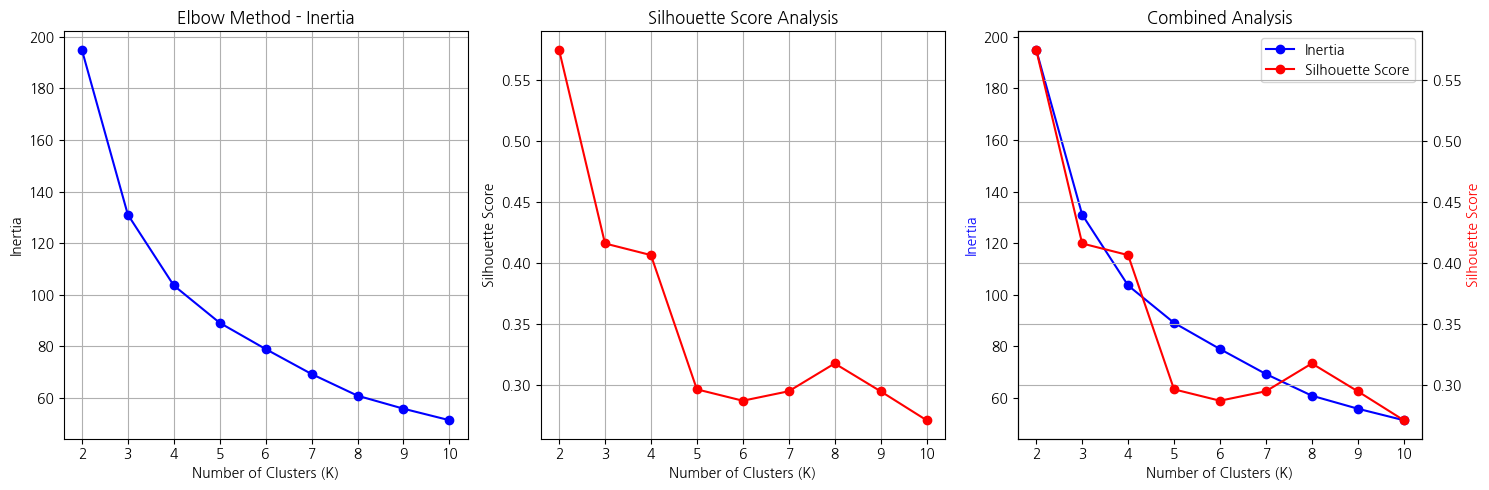


최적 K값: 2 (실루엣 점수 기반)

=== K-means 클러스터링 (K=2) ===
클러스터링 완료 - 각 클러스터별 국가 수:
Cluster
0    86
1    22
Name: count, dtype: int64

=== PCA를 이용한 2차원 시각화 ===


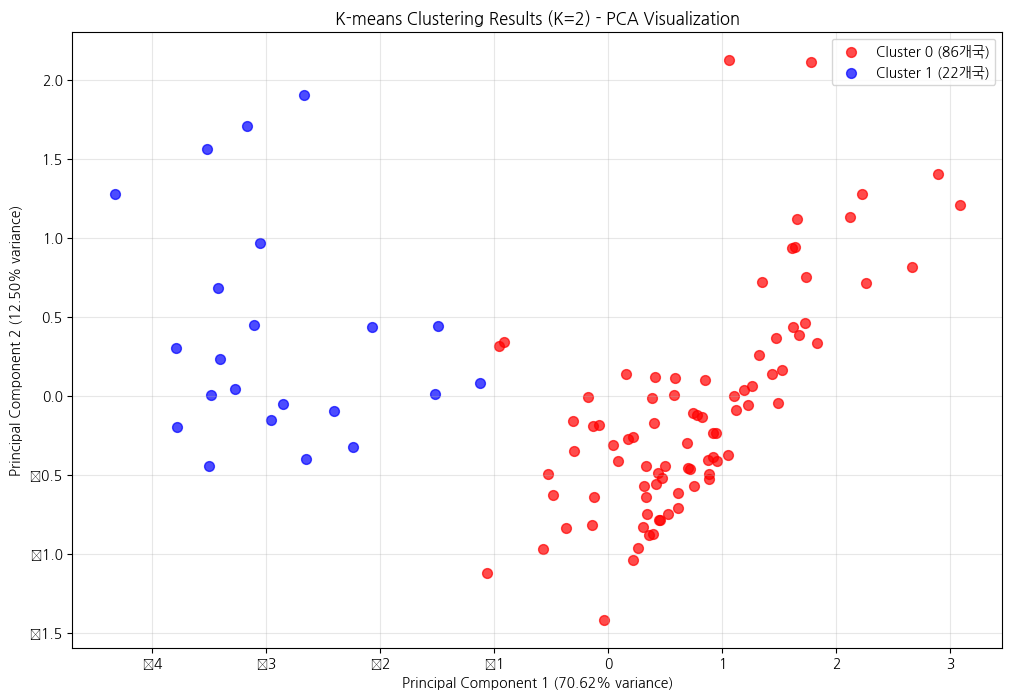


=== 국가별 클러스터 번호 ===
                  Country_Name  Cluster
                       Albania        0
                     Argentina        0
                     Australia        0
                       Austria        0
                      Barbados        0
                       Bahrain        0
                       Belgium        0
                       Belarus        0
                       Bolivia        0
                        Brazil        0
                        Belize        0
                        Bhutan        0
             Brunei Darussalam        0
                      Bulgaria        0
                        Canada        0
                    Cabo Verde        0
            Dominican Republic        0
                       Ecuador        0
                      Colombia        0
                         Chile        0
                    Costa Rica        0
                       Croatia        0
                        Cyprus        0
                   

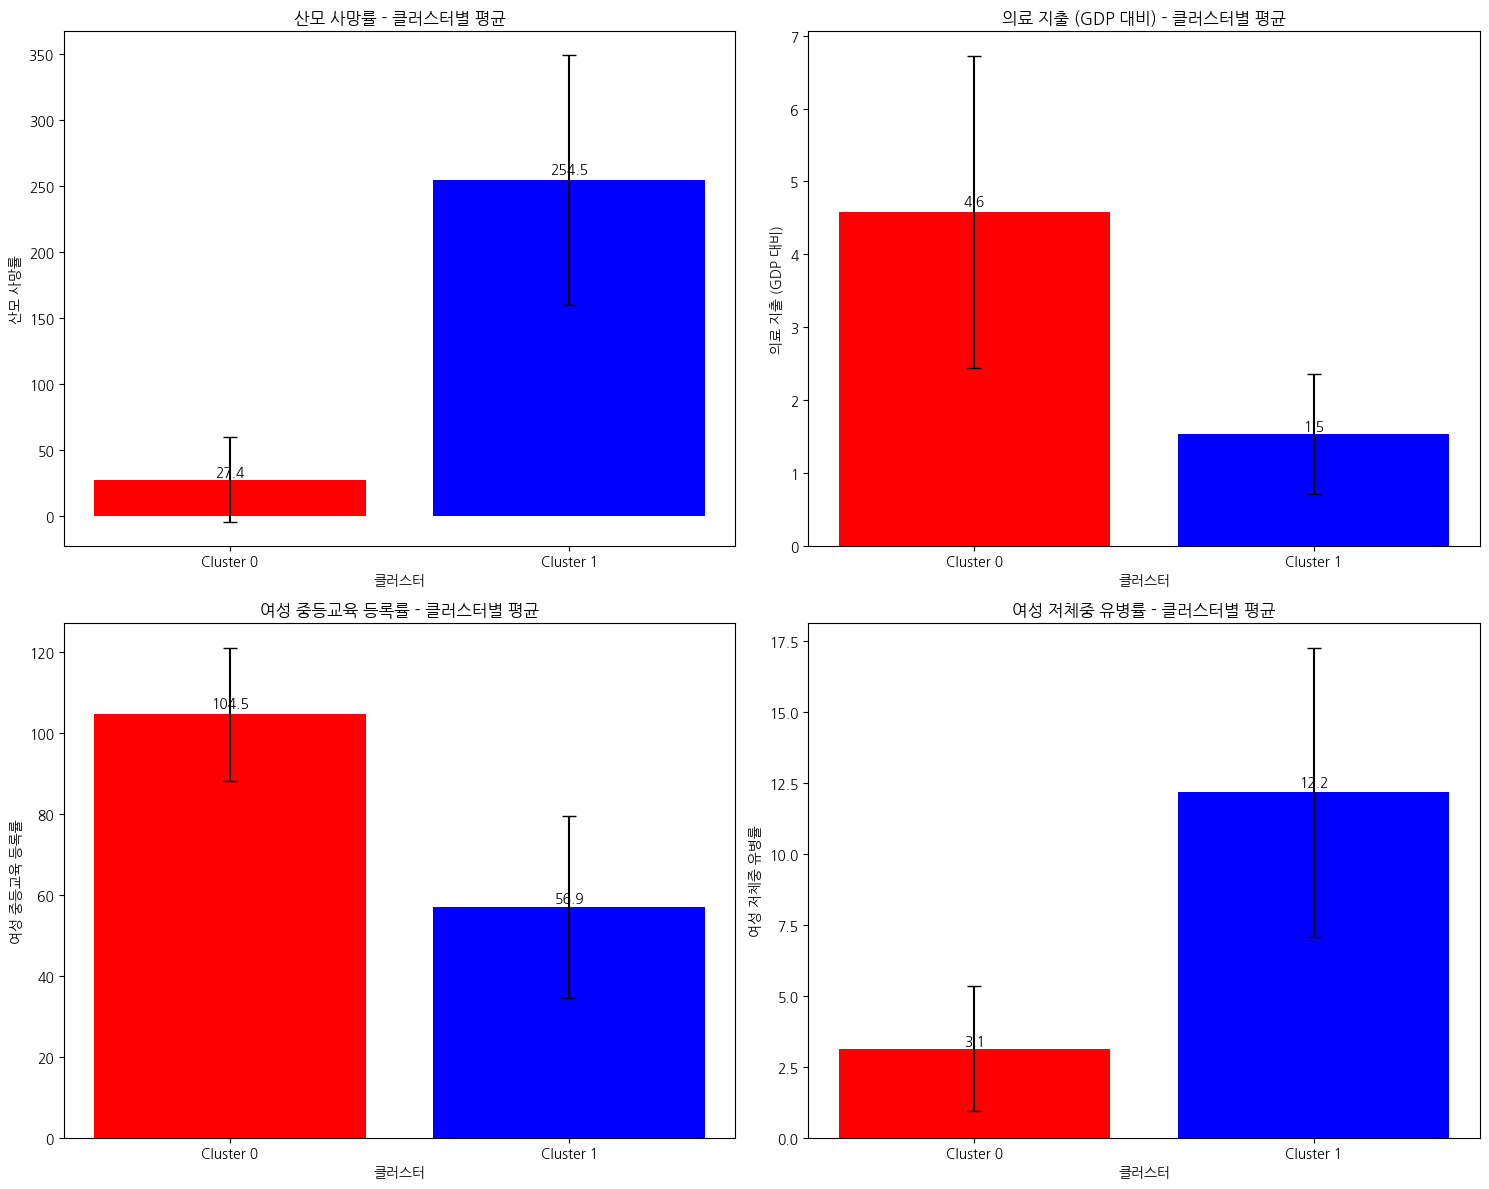


=== 클러스터별 상세 분석 ===

--- 클러스터 0 분석 ---
국가 수: 86개
대표 국가들: Albania, Argentina, Australia, Austria, Bahrain
평균 산모 사망률: 27.4
평균 의료 지출: 4.58%
평균 여성 중등교육 등록률: 104.5%
평균 여성 저체중 유병률: 3.1%

--- 클러스터 1 분석 ---
국가 수: 22개
대표 국가들: Angola, Bangladesh, Burkina Faso, Cameroon, Djibouti
평균 산모 사망률: 254.5
평균 의료 지출: 1.53%
평균 여성 중등교육 등록률: 56.9%
평균 여성 저체중 유병률: 12.2%

=== 클러스터별 특징 요약 ===
클러스터별 평균값:
         Maternal_Mortality_Ratio  Health_Expenditure_GDP  \
Cluster                                                     
0                           27.42                    4.58   
1                          254.55                    1.53   

         Female_Secondary_Enrollment  Female_Underweight_Prevalence  
Cluster                                                              
0                             104.53                           3.14  
1                              56.95                          12.16  

=== 클러스터별 특징 해석 ===

클러스터 0:
  - 산모 사망률: 낮음 (27.4)
  - 의료 지출: 보통 (4.58%)
  - 여성 중등교육 등록률: 104.5

In [ ]:

# ============================================================================
# 클러스터링 분석 시작
# ============================================================================

print("\n" + "="*60)
print("클러스터링 분석")
print("="*60)

# 클러스터링을 위한 데이터 준비
print("\n=== 클러스터링 데이터 준비 ===")

# 필요한 변수만 선택 (4개: 사망률, 지출, 교육률, 저체중)
cluster_data = merged_data_clean[['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
                                 'Female_Secondary_Enrollment', 'Female_Underweight_Prevalence']].copy()

print(f"클러스터링 데이터 크기: {cluster_data.shape}")
print(f"사용 변수: {list(cluster_data.columns)}")

# 결측치 확인 및 제거
print(f"\n결측치 개수: {cluster_data.isnull().sum().sum()}")
cluster_data = cluster_data.dropna()
print(f"결측치 제거 후 데이터 크기: {cluster_data.shape}")

# 스케일링 (StandardScaler 사용)
print("\n=== 데이터 스케일링 ===")
scaler_cluster = StandardScaler()
cluster_data_scaled = scaler_cluster.fit_transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns)

# 👉 인덱스 유지해서 라벨 부착 시 길이/정렬 문제 방지
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled,
                                      columns=cluster_data.columns,
                                      index=cluster_data.index)
print("스케일링 완료")
print("스케일링 후 데이터 통계:")
print(cluster_data_scaled_df.describe())


# 샘플 수 대비 K 안전 범위
max_k = max(2, min(10, len(cluster_data) - 1))
K_range = range(2, max_k + 1)



# K값 선택 - 엘보우 기법
print("\n=== 엘보우 기법으로 최적 K값 찾기 ===")

inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)

    # 실루엣 점수 계산
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(cluster_data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.3f}")

# 엘보우 곡선 시각화
plt.figure(figsize=(15, 5))

# Inertia 곡선
plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.grid(True)

# 실루엣 점수 곡선
plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)

# 실루엣 점수와 Inertia 결합
plt.subplot(1, 3, 3)
ax1 = plt.gca()
ax2 = ax1.twinx()

line1 = ax1.plot(K_range, inertias, 'bo-', label='Inertia')
line2 = ax2.plot(K_range, silhouette_scores, 'ro-', label='Silhouette Score')

ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color='b')
ax2.set_ylabel('Silhouette Score', color='r')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Combined Analysis')
plt.grid(True)

plt.tight_layout()
plt.savefig('elbow_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 최적 K값 선택
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n최적 K값: {optimal_k} (실루엣 점수 기반)")

# K-means 클러스터링 실행
print(f"\n=== K-means 클러스터링 (K={optimal_k}) ===")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_data_scaled)

# 👉 인덱스를 유지한 채 결과 붙이기
cluster_results = merged_data_clean.loc[cluster_data_scaled_df.index].copy()
cluster_results['Cluster'] = cluster_labels


# 클러스터 결과를 원본 데이터에 추가
cluster_results = merged_data_clean.copy()
cluster_results['Cluster'] = cluster_labels

print(f"클러스터링 완료 - 각 클러스터별 국가 수:")
print(cluster_results['Cluster'].value_counts().sort_index())

# PCA를 이용한 2차원 축소 및 시각화
print("\n=== PCA를 이용한 2차원 시각화 ===")

pca = PCA(n_components=2)
cluster_data_pca = pca.fit_transform(cluster_data_scaled)

# PCA 결과를 데이터프레임에 추가
cluster_results['PCA1'] = cluster_data_pca[:, 0]
cluster_results['PCA2'] = cluster_data_pca[:, 1]

# 클러스터별 시각화
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(optimal_k):
    cluster_data = cluster_results[cluster_results['Cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                c=colors[i], label=f'Cluster {i} ({len(cluster_data)}개국)', alpha=0.7, s=50)

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title(f'K-means Clustering Results (K={optimal_k}) - PCA Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# 국가별 클러스터 번호 출력
print("\n=== 국가별 클러스터 번호 ===")
country_cluster = cluster_results[['Country_Name', 'Cluster']].sort_values('Cluster')
print(country_cluster.to_string(index=False))

# 클러스터별 특징 분석
print("\n=== 클러스터별 특징 분석 ===")

cluster_analysis = cluster_results.groupby('Cluster').agg({
    'Maternal_Mortality_Ratio': ['mean', 'std', 'min', 'max'],
    'Health_Expenditure_GDP': ['mean', 'std', 'min', 'max'],
    'Female_Secondary_Enrollment': ['mean', 'std', 'min', 'max'],
    'Female_Underweight_Prevalence': ['mean', 'std', 'min', 'max']
}).round(2)

print("클러스터별 통계:")
print(cluster_analysis)

# 클러스터별 특징 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
variables = ['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
            'Female_Secondary_Enrollment', 'Female_Underweight_Prevalence']
variable_names = ['산모 사망률', '의료 지출 (GDP 대비)', '여성 중등교육 등록률', '여성 저체중 유병률']

for i, (var, name) in enumerate(zip(variables, variable_names)):
    row = i // 2
    col = i % 2

    cluster_means = cluster_results.groupby('Cluster')[var].mean()
    cluster_stds = cluster_results.groupby('Cluster')[var].std()

    bars = axes[row, col].bar(range(len(cluster_means)), cluster_means,
                              yerr=cluster_stds, capsize=5, color=colors[:len(cluster_means)])
    axes[row, col].set_xlabel('클러스터')
    axes[row, col].set_ylabel(name)
    axes[row, col].set_title(f'{name} - 클러스터별 평균')
    axes[row, col].set_xticks(range(len(cluster_means)))
    axes[row, col].set_xticklabels([f'Cluster {i}' for i in range(len(cluster_means))])

    # 값 표시
    for bar, mean_val in zip(bars, cluster_means):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                           f'{mean_val:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('cluster_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

# 클러스터별 상세 분석
print("\n=== 클러스터별 상세 분석 ===")

for cluster_id in range(optimal_k):
    cluster_countries = cluster_results[cluster_results['Cluster'] == cluster_id]

    print(f"\n--- 클러스터 {cluster_id} 분석 ---")
    print(f"국가 수: {len(cluster_countries)}개")
    print(f"대표 국가들: {', '.join(cluster_countries['Country_Name'].head(5).tolist())}")

    print(f"평균 산모 사망률: {cluster_countries['Maternal_Mortality_Ratio'].mean():.1f}")
    print(f"평균 의료 지출: {cluster_countries['Health_Expenditure_GDP'].mean():.2f}%")
    print(f"평균 여성 중등교육 등록률: {cluster_countries['Female_Secondary_Enrollment'].mean():.1f}%")
    print(f"평균 여성 저체중 유병률: {cluster_countries['Female_Underweight_Prevalence'].mean():.1f}%")

# 클러스터별 특징 요약
print("\n=== 클러스터별 특징 요약 ===")

cluster_summary = cluster_results.groupby('Cluster').agg({
    'Maternal_Mortality_Ratio': 'mean',
    'Health_Expenditure_GDP': 'mean',
    'Female_Secondary_Enrollment': 'mean',
    'Female_Underweight_Prevalence': 'mean'
}).round(2)

print("클러스터별 평균값:")
print(cluster_summary)

# 클러스터별 특징 해석
print("\n=== 클러스터별 특징 해석 ===")

for cluster_id in range(optimal_k):
    cluster_data = cluster_summary.loc[cluster_id]

    print(f"\n클러스터 {cluster_id}:")
    if cluster_data['Maternal_Mortality_Ratio'] < 50:
        mortality_level = "낮음"
    elif cluster_data['Maternal_Mortality_Ratio'] < 200:
        mortality_level = "보통"
    else:
        mortality_level = "높음"

    if cluster_data['Health_Expenditure_GDP'] < 3:
        health_level = "낮음"
    elif cluster_data['Health_Expenditure_GDP'] < 6:
        health_level = "보통"
    else:
        health_level = "높음"

    print(f"  - 산모 사망률: {mortality_level} ({cluster_data['Maternal_Mortality_Ratio']:.1f})")
    print(f"  - 의료 지출: {health_level} ({cluster_data['Health_Expenditure_GDP']:.2f}%)")
    print(f"  - 여성 중등교육 등록률: {cluster_data['Female_Secondary_Enrollment']:.1f}%")
    print(f"  - 여성 저체중 유병률: {cluster_data['Female_Underweight_Prevalence']:.1f}%")

print("\n" + "="*60)
print("클러스터링 분석 완료")
print("="*60)


디테일 포인트
그래프의 오차막대(표준편차)는 특히 Cluster 1의 사망률에서 큼 → 이질성이 커서 (아주 열악한 국가부터 중간수준까지) 섞여 있음.

등록률이 100% 초과인 건 지표가 **gross(명목)**라 학령 초과·중복 재학이 포함돼서 가능.

무엇을 말해주나
교육(↑), 보건지출(↑), 영양상태(저체중↓)가 동시에 좋아지면 모성 사망률이 낮다는 패턴이 군집 수준에서도 뚜렷.

정책적으로 Cluster 1에선 보건 재정 확대 + 여성 중등교육 접근 + 영양개입이 우선순위.

다음 체크(짧게)
Cluster 1의 분산이 커서 K=3도 시험해 서브군(예: “지출은 높지만 성과 낮은 비효율군”)이 있는지 확인하면 좋아.

연도 바꿔 **안정성(temporal stability)**도 한번 검증하면 발표 신뢰도 ↑.

📊 분석 결과 요약

🔍 데이터 전처리 결과

총 108개 국가의 2016년 데이터 분석

4개 주요 변수: 산모 사망률, 의료 지출, 여성 중등교육 등록률, 여성 저체중 유병률

결측치 및 이상치 처리 완료

- 회귀 분석 결과

모델 성능 비교:

Linear Regression: R² = 0.3706 (최고 성능)

Random Forest: R² = 0.3137

Gradient Boosting: R² = 0.2624

의료 지출의 영향:

다중회귀 계수: 3.8361 (양의 상관관계)

의료 지출이 증가할수록 산모 사망률이 증가하는 경향

이는 의료 지출이 높은 국가일수록 산모 사망률이 높다는 것을 의미

특성 중요도:

여성 중등교육 등록률이 가장 중요한 예측 변수 (84-88%)

의료 지출은 상대적으로 낮은 중요도 (8-10%)

🎯 클러스터링 분석 결과

최적 클러스터 수: 2개 (실루엣 점수 기반)

클러스터 0 (86개국) - 선진국 그룹:

평균 산모 사망률: 27

----

=== 상호작용 OLS(HC3) 요약 ===
                       coef  se(HC3)       t       p
Intercept           79.7766   8.7209  9.1477  0.0000
Enroll_c            -2.6893   0.3904 -6.8883  0.0000
Health_c            -8.8954   5.3119 -1.6746  0.0940
Underwt_c            4.4524   3.3364  1.3345  0.1820
Enroll_c:Health_c    0.5332   0.1067  4.9962  0.0000
Health_c:Underwt_c   1.2363   1.6505  0.7491  0.4538

[시너지 판정] β_EH(Enroll×Health) = 0.5332, p = 0.0000
→ 시너지가 약하거나 통계적으로 불확실.
지출 1.5%에서 '교육 1%p↑'의 예상 MMR 변화: -3.49
지출 3.0%에서 '교육 1%p↑'의 예상 MMR 변화: -2.69
지출 4.5%에서 '교육 1%p↑'의 예상 MMR 변화: -1.89
지출 6.0%에서 '교육 1%p↑'의 예상 MMR 변화: -1.09


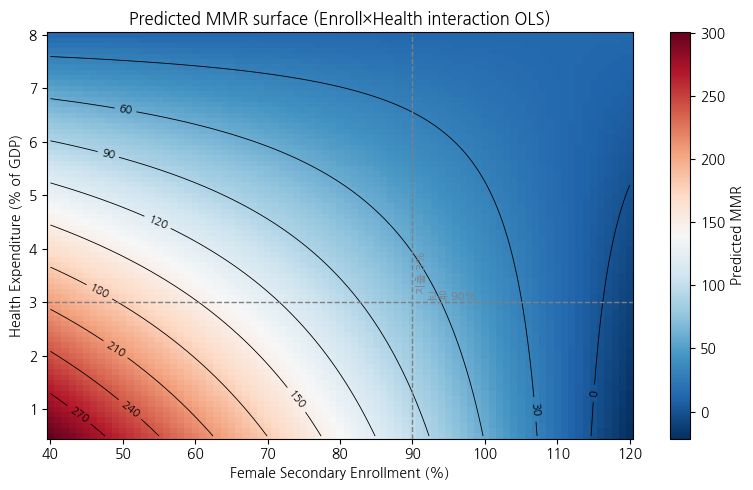

In [ ]:
# === OLS 상호작용(교육×지출) + 2D 히트맵 : 복붙-단일셀 ===
# 전제: merged_data_clean (cols: Maternal_Mortality_Ratio, Health_Expenditure_GDP,
#       Female_Secondary_Enrollment, Female_Underweight_Prevalence) 가 이미 존재

# 0) 임포트(+statsmodels 없으면 설치)
try:
    import numpy as np, pandas as pd, matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "statsmodels", "-q"])
    import numpy as np, pandas as pd, matplotlib.pyplot as plt
    import statsmodels.formula.api as smf

df_int = merged_data_clean.copy()

# 1) 센터링(컷오프 해석을 쉽게) — 지출 3%, 교육 90%, 저체중 5% 기준
df_int['Health_c']  = df_int['Health_Expenditure_GDP'] - 3.0
df_int['Enroll_c']  = df_int['Female_Secondary_Enrollment'] - 90.0
df_int['Underwt_c'] = df_int['Female_Underweight_Prevalence'] - 5.0

# 2) 상호작용 포함 OLS(견고표준오차 HC3)
formula = """
Maternal_Mortality_Ratio ~ Enroll_c + Health_c + Underwt_c
                          + Enroll_c:Health_c + Health_c:Underwt_c
"""
ols_int = smf.ols(formula, data=df_int).fit(cov_type="HC3")

# 3) 요약 출력(계수/SE/t/p)
tbl = pd.DataFrame({
    'coef': ols_int.params,
    'se(HC3)': ols_int.bse,
    't': ols_int.tvalues,
    'p': ols_int.pvalues
}).loc[['Intercept','Enroll_c','Health_c','Underwt_c','Enroll_c:Health_c','Health_c:Underwt_c']].round(4)
print("=== 상호작용 OLS(HC3) 요약 ===")
print(tbl)

# 4) 시너지 판정 + 한계효과(지출 수준별 '교육 1%p↑'의 MMR 변화)
beta = ols_int.params['Enroll_c:Health_c']
pval = ols_int.pvalues['Enroll_c:Health_c']
print(f"\n[시너지 판정] β_EH(Enroll×Health) = {beta:.4f}, p = {pval:.4f}")
if (beta < 0) and (pval < 0.05):
    print("→ 지출이 높을수록 '교육 1%p↑'의 MMR 감소효과가 더 커지는 시너지 존재.")
else:
    print("→ 시너지가 약하거나 통계적으로 불확실.")

bE  = ols_int.params['Enroll_c']
bEH = ols_int.params['Enroll_c:Health_c']
def edu_effect_at(h):  # h: 보건지출(% of GDP)
    return bE + bEH*(h - 3.0)

for h in [1.5, 3.0, 4.5, 6.0]:
    print(f"지출 {h:.1f}%에서 '교육 1%p↑'의 예상 MMR 변화: {edu_effect_at(h):.2f}")

# 5) 2D 히트맵(교육×지출) — 저체중은 중앙값 고정
E_min = max(40, float(df_int['Female_Secondary_Enrollment'].min()))
E_max = min(120, float(df_int['Female_Secondary_Enrollment'].max()))
H_min = max(0.5, float(df_int['Health_Expenditure_GDP'].min()))
H_max = min(8.0, float(df_int['Health_Expenditure_GDP'].max()))

E = np.linspace(E_min, E_max, 81)   # 교육(%)
H = np.linspace(H_min, H_max, 76)   # 지출(% of GDP)
EE, HH = np.meshgrid(E, H)

X_pred = pd.DataFrame({
    'Enroll_c' : EE.ravel() - 90.0,
    'Health_c' : HH.ravel() - 3.0,
    'Underwt_c': np.full(EE.size, df_int['Underwt_c'].median())
})
X_pred['Enroll_c:Health_c']  = X_pred['Enroll_c'] * X_pred['Health_c']
X_pred['Health_c:Underwt_c'] = X_pred['Health_c'] * X_pred['Underwt_c']

Z = ols_int.predict(X_pred).values.reshape(HH.shape)

plt.figure(figsize=(8,5))
im = plt.pcolormesh(EE, HH, Z, shading='auto', cmap='RdBu_r')
cs = plt.contour(EE, HH, Z, colors='k', levels=10, linewidths=0.6)
plt.clabel(cs, inline=True, fontsize=8)
plt.axhline(3.0, color='gray', ls='--', lw=1)
plt.axvline(90.0, color='gray', ls='--', lw=1)
plt.text(92, 3.05, '교육 90%', fontsize=8, color='gray')
plt.text(90.5, 3.2, '지출 3%', fontsize=8, color='gray', rotation=90)
plt.xlabel('Female Secondary Enrollment (%)')
plt.ylabel('Health Expenditure (% of GDP)')
plt.title('Predicted MMR surface (Enroll×Health interaction OLS)')
cbar = plt.colorbar(im); cbar.set_label('Predicted MMR')
plt.tight_layout(); plt.show()


=== 힌지 회귀(지출 3%) — 계수 요약 ===
                                   coef  se(HC3)       t       p
Intercept                      346.6459  83.2034  4.1662  0.0000
Health_Expenditure_GDP         -25.4613  27.2679 -0.9337  0.3504
Health_hinge_3p                 28.2669  28.6628  0.9862  0.3240
Female_Secondary_Enrollment     -2.4324   0.4809 -5.0584  0.0000
Female_Underweight_Prevalence    3.7639   3.5079  1.0730  0.2833

[기울기 해석] 지출 < 3%에서 slope = -25.461  /  지출 ≥ 3%에서 slope = 2.806
[임계효과 유의성] Health_hinge_3p (기울기 차이) p = 0.3240


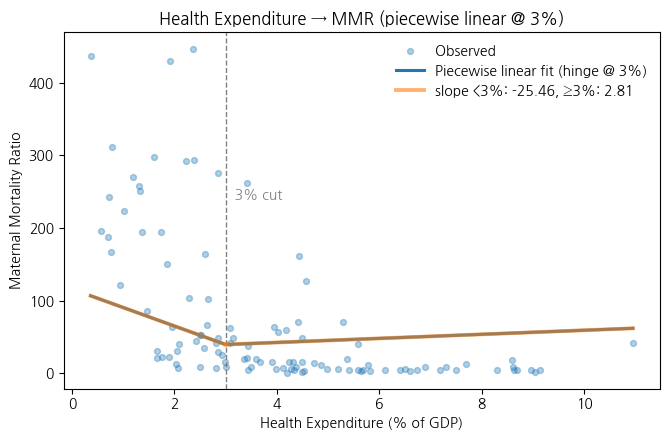


[쉬운 해석]
- 지출이 3%보다 낮을 땐, 지출을 1%p 올릴 때 MMR이 평균 25.5만큼 감소합니다.
- 지출이 3% 이상에선, 같은 1%p 상승에 MMR이 평균 2.8만큼 증가합니다.
- '기울기 차이(≥3% vs <3%)'의 유의성 p=0.3240 입니다.
→ 3%를 기준으로 지출의 효과가 달라지는지(임계효과)가 위 통계로 판정됩니다.


In [ ]:
# === "지출 3% 임계값" 강제: 힌지(조각선형) 회귀 단일셀 ===
# 전제: merged_data_clean (cols: Maternal_Mortality_Ratio, Health_Expenditure_GDP,
#       Female_Secondary_Enrollment, Female_Underweight_Prevalence) 가 이미 존재

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.formula.api as smf

assert 'merged_data_clean' in globals(), "merged_data_clean 이 먼저 만들어져 있어야 합니다."

# 1) 데이터 준비 + 힌지 변환(지출 3% 기준)
df = merged_data_clean.copy()
df = df[['Maternal_Mortality_Ratio','Health_Expenditure_GDP',
         'Female_Secondary_Enrollment','Female_Underweight_Prevalence']].dropna().astype(float)

df['Health_hinge_3p'] = np.clip(df['Health_Expenditure_GDP'] - 3.0, 0, None)  # max(Health-3, 0)
# 해석 편의를 위한 보조(중앙값 고정용)
E_med = float(df['Female_Secondary_Enrollment'].median())
U_med = float(df['Female_Underweight_Prevalence'].median())

# 2) 조각선형 OLS (지출 3% 이전/이후 기울기 구분) + 견고표준오차(HC3)
#    slope(<3%) = β_H,  slope(≥3%) = β_H + β_hinge
formula = "Maternal_Mortality_Ratio ~ Health_Expenditure_GDP + Health_hinge_3p + Female_Secondary_Enrollment + Female_Underweight_Prevalence"
m_hinge = smf.ols(formula, data=df).fit(cov_type="HC3")

# 3) 요약 출력(핵심 계수 + p)
summary_tbl = (pd.DataFrame({
    'coef': m_hinge.params,
    'se(HC3)': m_hinge.bse,
    't': m_hinge.tvalues,
    'p': m_hinge.pvalues
}).loc[['Intercept','Health_Expenditure_GDP','Health_hinge_3p','Female_Secondary_Enrollment','Female_Underweight_Prevalence']]
  .round(4))
print("=== 힌지 회귀(지출 3%) — 계수 요약 ===")
print(summary_tbl)

bH  = m_hinge.params['Health_Expenditure_GDP']
bHg = m_hinge.params['Health_hinge_3p']
slope_below  = bH
slope_above  = bH + bHg
print(f"\n[기울기 해석] 지출 < 3%에서 slope = {slope_below:.3f}  /  지출 ≥ 3%에서 slope = {slope_above:.3f}")
print(f"[임계효과 유의성] Health_hinge_3p (기울기 차이) p = {m_hinge.pvalues['Health_hinge_3p']:.4f}")

# 4) 예측 곡선(교육·저체중 중앙값에 고정한 상태에서 지출만 변화)
H_grid = np.linspace(df['Health_Expenditure_GDP'].min(), df['Health_Expenditure_GDP'].max(), 300)
grid = pd.DataFrame({
    'Health_Expenditure_GDP': H_grid,
    'Health_hinge_3p': np.clip(H_grid - 3.0, 0, None),
    'Female_Secondary_Enrollment': E_med,
    'Female_Underweight_Prevalence': U_med
})
pred = m_hinge.predict(grid)

# 5) 시각화: 산점 + 조각선형 예측 + 3% 수직선 + 구간별 기울기 주석
plt.figure(figsize=(6.8,4.5))
plt.scatter(df['Health_Expenditure_GDP'], df['Maternal_Mortality_Ratio'], alpha=0.35, s=18, label='Observed')
plt.plot(H_grid, pred, lw=2.2, label='Piecewise linear fit (hinge @ 3%)')
plt.axvline(3.0, color='gray', ls='--', lw=1)
plt.text(3.02, np.percentile(df['Maternal_Mortality_Ratio'], 90), '  3% cut', color='gray', va='top')

# 구간별 직선(시각 보조)
H1 = np.linspace(df['Health_Expenditure_GDP'].min(), 3.0, 2)
H2 = np.linspace(3.0, df['Health_Expenditure_GDP'].max(), 2)
G1 = pd.DataFrame({'Health_Expenditure_GDP': H1,
                   'Health_hinge_3p': np.zeros_like(H1),
                   'Female_Secondary_Enrollment': E_med,
                   'Female_Underweight_Prevalence': U_med})
G2 = pd.DataFrame({'Health_Expenditure_GDP': H2,
                   'Health_hinge_3p': H2-3.0,
                   'Female_Secondary_Enrollment': E_med,
                   'Female_Underweight_Prevalence': U_med})
plt.plot(H1, m_hinge.predict(G1), color='tab:orange', lw=2.8, alpha=0.6)
plt.plot(H2, m_hinge.predict(G2), color='tab:orange', lw=2.8, alpha=0.6, label=f"slope <3%: {slope_below:.2f}, ≥3%: {slope_above:.2f}")

plt.title("Health Expenditure → MMR (piecewise linear @ 3%)")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Maternal Mortality Ratio")
plt.legend(frameon=False)
plt.tight_layout(); plt.savefig("hinge_health_mmr_3pct.png", dpi=220); plt.show()

# 6) 쉬운 한국어 해석 문장 자동 출력
sign = "감소" if slope_below < 0 else "증가"
sign2 = "감소" if slope_above < 0 else "증가"
print("\n[쉬운 해석]")
print(f"- 지출이 3%보다 낮을 땐, 지출을 1%p 올릴 때 MMR이 평균 {abs(slope_below):.1f}만큼 {sign}합니다.")
print(f"- 지출이 3% 이상에선, 같은 1%p 상승에 MMR이 평균 {abs(slope_above):.1f}만큼 {sign2}합니다.")
print(f"- '기울기 차이(≥3% vs <3%)'의 유의성 p={m_hinge.pvalues['Health_hinge_3p']:.4f} 입니다.")
print("→ 3%를 기준으로 지출의 효과가 달라지는지(임계효과)가 위 통계로 판정됩니다.")
